# Métodos combinados de aprendizaje (*Ensemble Learning*)

El aprendizaje combinado se refiere al proceso de construir múltiples  modelos  y combinarlos de tal forma que puedan producir mejores resultados que los modelos individuales. Estos modelos individuales pueden ser clasificadores, regresores, o cualquier otra cosa que modele datos de alguna forma. El aprendizaje combinado es utilizado en múltiples campos aplicación incluyendo la clasificación de datos, modelamiento predictivo, detección de anomalías, entre otros.

*Ejemplo*

Supongamos que queremos comprar un nuevo televisor, pero no tenemos conocimiento de cuáles son los últimos modelos. Nuestro objetivo es obtener el mejor valor por el dinero que tenemos, pero no tenemos suficiente conocimiento sbore este tópico para tomar una decisión bien informada. Cuando queremos tomar una decisión acerca de este tipo de cosas, lo que hacemos es tratar de obtener opiniones de múltiples expertos en el tema. Esto nos ayudará  a tomar la mejor decisión. En lugar de basarnos en una sola opinión, tendemos a tomar una decisión final combinando las decisiones individuales de estos expertos. La razón de hacer esto es que queremos minimizar la posibilidad de una decisión errónea.


## Árboles de decisión

Un árbol de decisión es una estructura que nos permite dividir el conjunto de datos en ramas y tomar decisiones simples en cada nivel. Esto nos permitirá llegar a una decisión final caminando hacia abajo del árbol. Los árboles de decisión están constituidos por:

1. **Nodos interiores**: atributos
2. **Arcos**: posibles valores del nodo origen
3. ** Hojas**: valor de clasificación (usualmente + y -, aunque podría ser cualquier conjunto de valores, no necesariamente binario)


Los árboles de decisión se  producen por los algoritmos de entrenamiento, los cuales identifican cómo se pueden dividir los datos de la mejor manera posible.

Cualquier proceso de decisión inicia en el nodo raíz en la cima del árbol. Cada nodo es el árbol es básicamente una regla de decisión. Los algoritmos construyen estas reglas con base en la relación entre los datos de entrada y las etiquetas en el conjunto de entrenamiento. Los valores en el conjunto de entrada se utilizan para  estimar los valores de la salida. 


### Algoritmo ID3

El algoritmo ID3 es utilizado dentro del ámbito de la inteligencia artificial. Su uso se engloba en la búsqueda de hipótesis o reglas en él, dado un conjunto de ejemplos. 

El conjunto de ejemplos deberá estar conformado por una serie de tuplas de valores, cada uno de ellos denominados atributos, en el que uno de ellos, ( el atributo a clasificar ) es el objetivo, el cual es de tipo binario ( positivo o negativo, sí o no, válido o inválido, etc. ).

De esta forma el algoritmo trata de obtener las hipótesis que clasifiquen ante nuevas instancias, si dicho ejemplo va a ser positivo o negativo.

**ID3(Ejemplos, Atributo-objetivo, Atributos)**

1. Si todos los Ejemplos son positivos, devolver un nodo etiquetado con +
2. Si todos los Ejemplos son negativos, devolver un nodo etiquetado con -
3. Si Atributos está vacío, devolver un nodo etiquetado con el valor más frecuente de Atributo-objetivo en Ejemplos.
4. En otro caso: 

        4.1. Sea $A$ el atributo de Atributos que MEJOR clasifica Ejemplos
        4.2. Crear Árbol, con un nodo etiquetado con $A$.
        4.3. Para cada posible valor $v$ de $A$, hacer:
                * Añadir un arco a Árbol, etiquetado con $v$.
                * Sea Ejemplos($v$) el subconjunto de Ejemplos con valor del atributo $A$ igual a $v$.
                * Si Ejemplos($v$) es vacío:
                         - Entonces colocar debajo del arco anterior un nodo etiquetado con el valor más frecuente de Atributo-objetivo en Ejemplos.
                          - Si no, colocar debajo del arco anterior el sub árbol
                            ID3(Ejemplos($v$), Atributo-objetivo, Atributos-{$A$}).
    
        4.4 Devolver árbol


### ¿Cómo saber qué atributo clasifica mejor?

Entropía de un conjunto de ejemplos $D$:

$$Ent(D)=-\frac{|P|}{|D|}\log_{2}\frac{|P|}{|D|}-\frac{|N|}{|D|}\log_{2}\frac{|N|}{|D|}$$

  donde $P$ y $N$ son los subconjuntos de ejemplos positivos y negativos de $D$. La notación es $Ent([p+,n-])$
  
**Ejemplos**
$Ent([9+,5-])=\frac{|9|}{|14|}\log_{2}\frac{|9|}{|14|}-\frac{|5|}{|14|}\log_{2}\frac{|5|}{|14|}=0.94$

Preferimos nodos conmenos entropía (árboles pequeños).

La **entropía esperada** después de usar un atributo $A$ igual a $v$

$$\sum_{v\in Valores(A)}\frac{|D_v|}{|D|}Ent(D_v)$$

donde $D_v$ es el subconjunto de ejemplos de $D$ con valor del atributo $A$ igual a $v$

La **ganancia de información esperada** después de usar un atributo $A$:

$$Ganancia(D,A)=Ent(D)-\sum_{v\in Valores(A)}\frac{|D_v|}{|D|}Ent(D_v)$$

En el algoritmo ID3, en cada nodo usamos el atributo con mayor ganacia de información (considerando los ejemplos correspondientes al nodo)

## Construcción de un clasificador de árbol de decisión

A continuación construiremos un árbol de decisión con python:

In [46]:
# primero importamos las librerías necesarias

import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report  #esta librería nos ayudará a tener a la salida diferentes métricas, no solo el acierto de clasificación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #librería para el árbol de decisión
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np 

C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# cargamos los datos
input_file = 'datos_arboles.txt'
datos = np.loadtxt(input_file,delimiter =',')
X, y = datos[:,:-1], datos[:,-1]

In [5]:
# sepramos los datos en dos clases separadas basados en las etiquetas
clase0 = np.array(X[y==0]) #en clase0 quedarán todos los datos que tengan la etiqueta 0
clase1 = np.array(X[y==1])  #en clase1 quedarán todas las observaciones que tengan la etiqueta 1

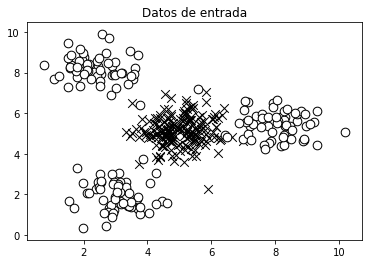

In [6]:
# visualizamos los datos
plt.figure()
plt.scatter(clase0[:, 0], clase0[:, 1], s=75, facecolors='black',  
            edgecolors='black', linewidth=1, marker='x')  #para la clase 0
plt.scatter(clase1[:, 0], clase1[:, 1], s=75, facecolors='white', #para la clase 1 
            edgecolors='black', linewidth=1, marker='o') 
plt.title('Datos de entrada')
plt.show()

** Actividad 1**

Divide los datos de entrada en entrenamiento y validación. Utiliza como semilla el valor de 5 ($\verb|random_state = 5|$)

In [7]:
#Espacio para solucionar la actividad 1

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 5)


In [8]:
# construimos el árbol de decisión, el parámetro max_depth se refiere a la profundidad del árbol (Número de niveles)
parametros = {'random_state':0,'max_depth':4} #definición de parámetros
clasificador = DecisionTreeClassifier(**parametros) #instanciamos el clasificador
clasificador.fit(X_train, y_train) #entrenamos el clasificador

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

** Actividad 2**

Visualiza el clasificador para el conjunto de entrenamiento

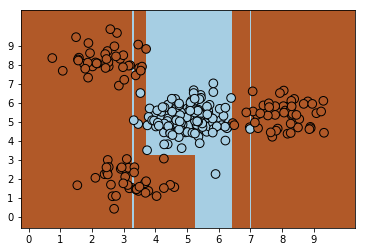

In [18]:
#espacio para solucionar la actividad 2
def visualizar_clasificador(clasificador, X, y): #definimos la función. Las entradas son el clasificador (instanciamiento), 
    #la matriz de observaciones y el vector de etiquetas.
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 1 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 2
    #definimos el paso de la malla (todos los valores que nos permiten graficar las fronteras)
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

    
visualizar_clasificador(clasificador, X_train, y_train)

In [38]:
#validamos en el grupo de test
y_pred = clasificador.predict(X_test)

** Actividad 3**

Visualiza el clasificador para el conjunto de validación o test

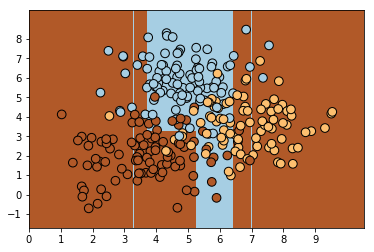

In [39]:
#espacio para solucionar la actividad 3
visualizar_clasificador(clasificador, X_test, y_test)

In [40]:
#evaluamos el desempeño del clasificador imprimiendo el reporte de clasificación
nombres_clases = ['Clase 0', 'Clase 1'] #generamos una lista con los nombres de las clases
print('\n'+"#"*40) 
print('\n Desempeño del clasificador sobre el conjunto de entrenamiento\n')
print(classification_report(y_train, clasificador.predict(X_train), target_names = nombres_clases))  #generamos e imprimimos el
#reporte para el conjunto de entrenamiento
print("#"*40 + "\n")

print("#"*40) 
print("\n Desempeño del clasificador sobre el conjunto de validación\n") 
print(classification_report(y_test, y_pred, target_names = nombres_clases)) #generamos e imprimimos el resporte para el
#conjunto de validación
print("#"*40 + "\n")
plt.show()

#la presición se refiere al acierto de la clasificación y el recall se refiere
# al número de items que fueron recuperados como un porcentaje sobre elnúmero
# de items que se deberían recuperar. F1 es la media armónica entre la precisión 
# y el recall.



########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.52      0.66      0.58       208
    Clase 1       0.37      0.62      0.46       214

avg / total       0.29      0.43      0.35       630

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.62      0.78      0.69        92
    Clase 1       0.38      0.67      0.48        86

avg / total       0.33      0.48      0.39       270

########################################



C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 3, does not match size of target_names, 2
  .format(len(labels), len(target_names))
C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Bosques aleatorios y extremadamente aleatorios

Un bosque aleatorio es una instancia particular de aprendizaje combinado donde se construyen modelos individuales usando árboles de decisión. Esta combinación se utiliza para predecir el valor de salida. En este caso, utilizamos un subconjunto aleatorio de entrenamiento para construir cada árbol de decisión, lo que asegurará la diversidad entre los árboles de decisión.

Una de las mejores caracteríticas de lo bosques aleatorios es que no se sobre-entrenan. 

Durante la construcción del árbol, los nodos se dividen sucesivamente y los mejores umbrales se eligen para reducir la entropía en cada nivel. Esta división no considera todas las características o atributos del conjunto de entrada. En lugar de esto, en el bosque aleatorio se selecciona la mejor divisón dentro de un subconjunto aleatorio de características que están bajo su consideración.  Esta aleatoriedad adicional tienda a incrementar el sesgo del bosque aleatorio, pero la varianza disminuye debido al promedio. Finalmente se puede obtener un modelo robusto.

Los **bosques extremadamente aleatorios** llevan la aleatoriedad a otro nivel. Además de tomar un subconjunto aleatorio de características, los umbrales también son aleatorios. Estos umbrales generados aleatoriamente se eligen como las reglas de división, lo que reduce aún más la varianza del modelo. Por lo tanto, los límites de decisión obtenidos usando los bosques extremadamente aleatorios tienden a ser más suaves que los obtenidos usando los bosques aleatorios.

## Construcción de clasificadores de bosque aleatorio y bosque extremadamente aleatorio

La construcción de ambos clasificadores es bastante similar, inclusive a la construcción de los árboles simples. 

La definición de los parámetros se define como:

$\verb|parametros = {'n_estimators':100, 'max_depth':  4, 'random_state':  0}|$

El parámetro $\verb|n_estimators|$ representa el número de árboles en el bosque.

Para el instanciamiento tenemos:

1. Para el bosque aleatorio : $\verb|clasificador = RandomForestClassifier(**parametros)|$
2. Para el bosque extremadamente aleatorio: $\verb|clasificador = ExtraTreesClassifier(**parametros)|$

** Actividad 4**

Compara el desempeño del clasificador basado en bosque aleatorio contra el basado en bosque extremadamente aleatorio usando los datos del archivo $\verb|datos_bosques_aleatorios.txt|$. Esta base de datos tiene 3 clases. Para la comparación realiza los siguientes items:

1. Lectura de la base de datos
2. División en entrenamiento y validación
3. Preprocesamiento de los datos
4. Visualización de los datos antes y después de preprocesar (tanto entrenamiento como validación)
5. Instanciamiento de los clasificadores utilizando 3 valores diferentes de número de árboles en cada  uno (serían en total 6 clasificadores)
6. Entrenamiento de los clasificadores
7. Validación de los clasificadores
8. Visualización de los clasificadores para entrenamiento y validación (o test)
9. Impresión de los reportes de los 6 clasificadores (3 clasificadores para bosques aleatorios, 3 clasificadores para bosques extremadamente aleatorios)

In [55]:
# espacio para solucionar la actividad 4
# leo la base de datos
input_file = 'datos_bosques_aleatorios.txt'
datos = np.loadtxt(input_file,delimiter =',')
X, y = datos[:,:-1], datos[:,-1]

#División en entrenamiento y validación

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 5)

#Preprocesamiento de los datos
def remocion(X_train, X_test):
    media = X_train.mean(axis = 0)
    desviacion = X_train.std(axis = 0)
    X_train_prepro = (X_train - media)/desviacion
    X_test_prepro = (X_test - media)/desviacion
    return X_train_prepro, X_test_prepro


X_train_preproR, X_test_preproR = remocion(X_train, X_test)


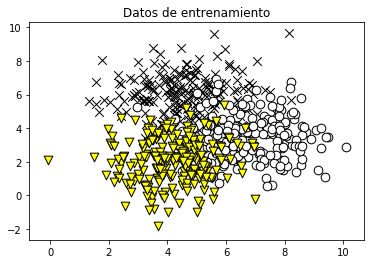

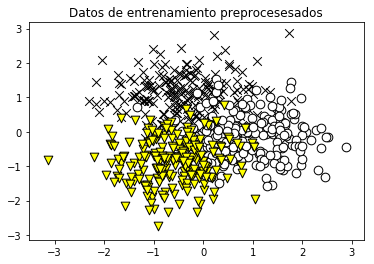

In [56]:
#separamos los datos de acuerdo para las etiquetas para entrenamiento 


clase0_train = np.array(X_train[y_train==0])
clase1_train = np.array(X_train[y_train==1])
clase2_train = np.array(X_train[y_train==2])

# visualizamos los datos para entrenamiento
plt.figure()
plt.scatter(clase0_train[:, 0], clase0_train[:, 1], s=75, facecolors='black',  
            edgecolors='black', linewidth=1, marker='x')  #para la clase 0
plt.scatter(clase1_train[:, 0], clase1_train[:, 1], s=75, facecolors='white', #para la clase 1 
            edgecolors='black', linewidth=1, marker='o')
plt.scatter(clase2_train[:, 0], clase2_train[:, 1], s=75, facecolors='yellow', #para la clase 1 
            edgecolors='black', linewidth=1, marker='v')
plt.title('Datos de entrenamiento')
plt.show()


#separamos los datos de acuerdo para las etiquetas para entrenamiento 


clase0_train_prepro = np.array(X_train_preproR[y_train==0])
clase1_train_prepro = np.array(X_train_preproR[y_train==1])
clase2_train_prepro = np.array(X_train_preproR[y_train==2])

# visualizamos los datos para entrenamiento
plt.figure()
plt.scatter(clase0_train_prepro[:, 0], clase0_train_prepro[:, 1], s=75, facecolors='black',  
            edgecolors='black', linewidth=1, marker='x')  #para la clase 0
plt.scatter(clase1_train_prepro[:, 0], clase1_train_prepro[:, 1], s=75, facecolors='white', #para la clase 1 
            edgecolors='black', linewidth=1, marker='o')
plt.scatter(clase2_train_prepro[:, 0], clase2_train_prepro[:, 1], s=75, facecolors='yellow', #para la clase 1 
            edgecolors='black', linewidth=1, marker='v')
plt.title('Datos de entrenamiento preprocesesados')
plt.show()

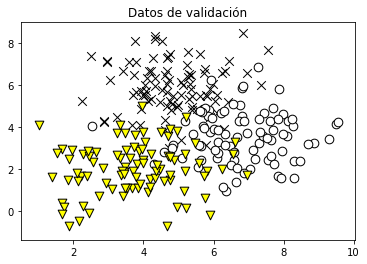

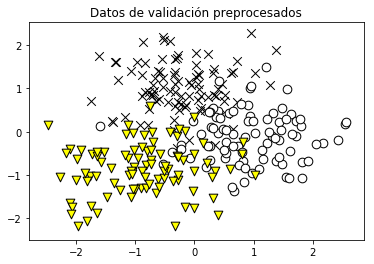

In [57]:
#separamos los datos de acuerdo para las etiquetas para los datos de vaidación 


clase0_test = np.array(X_test[y_test==0])
clase1_test = np.array(X_test[y_test==1])
clase2_test = np.array(X_test[y_test==2])

#visualizamos los datos de validación


plt.figure()
plt.scatter(clase0_test[:, 0], clase0_test[:, 1], s=75, facecolors='black',  
            edgecolors='black', linewidth=1, marker='x')  #para la clase 0
plt.scatter(clase1_test[:, 0], clase1_test[:, 1], s=75, facecolors='white', #para la clase 1 
            edgecolors='black', linewidth=1, marker='o')
plt.scatter(clase2_test[:, 0], clase2_test[:, 1], s=75, facecolors='yellow', #para la clase 1 
            edgecolors='black', linewidth=1, marker='v')
plt.title('Datos de validación')
plt.show()

clase0_test_prepro = np.array(X_test_preproR[y_test==0])
clase1_test_prepro = np.array(X_test_preproR[y_test==1])
clase2_test_prepro = np.array(X_test_preproR[y_test==2])

#visualizamos los datos de validación preprocesados


plt.figure()
plt.scatter(clase0_test_prepro[:, 0], clase0_test_prepro[:, 1], s=75, facecolors='black',  
            edgecolors='black', linewidth=1, marker='x')  #para la clase 0
plt.scatter(clase1_test_prepro[:, 0], clase1_test_prepro[:, 1], s=75, facecolors='white', #para la clase 1 
            edgecolors='black', linewidth=1, marker='o')
plt.scatter(clase2_test_prepro[:, 0], clase2_test_prepro[:, 1], s=75, facecolors='yellow', #para la clase 1 
            edgecolors='black', linewidth=1, marker='v')
plt.title('Datos de validación preprocesados')
plt.show()

numeros de arbol aleatorio 50
Clasificador entrenamiento


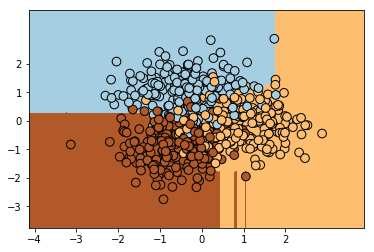

Clasificador validación


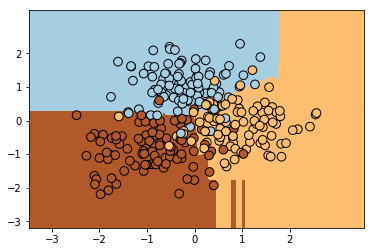


########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.90      0.85      0.87       208
    Clase 1       0.83      0.87      0.85       214
    Clase 3       0.85      0.87      0.86       208

avg / total       0.86      0.86      0.86       630

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.90      0.86      0.88        92
    Clase 1       0.83      0.84      0.83        86
    Clase 3       0.85      0.88      0.87        92

avg / total       0.86      0.86      0.86       270

########################################

numeros de arbol aleatorio 100
Clasificador entrenamiento


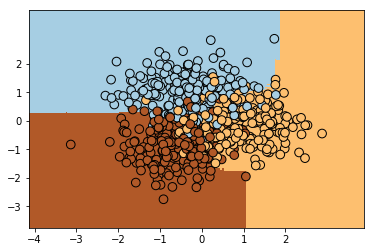

Clasificador validación


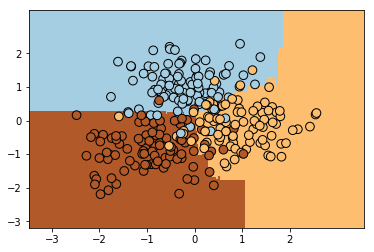


########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.91      0.85      0.88       208
    Clase 1       0.83      0.87      0.85       214
    Clase 3       0.85      0.88      0.86       208

avg / total       0.87      0.86      0.86       630

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.90      0.86      0.88        92
    Clase 1       0.83      0.84      0.83        86
    Clase 3       0.85      0.88      0.87        92

avg / total       0.86      0.86      0.86       270

########################################

numeros de arbol aleatorio 150
Clasificador entrenamiento


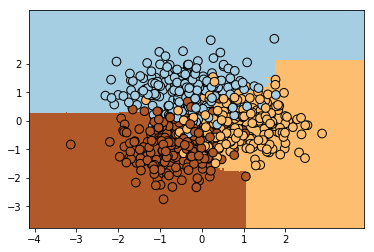

Clasificador validación


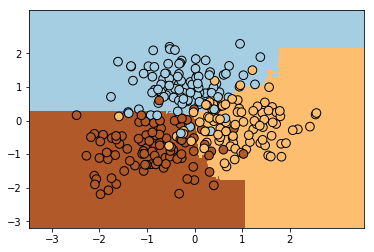


########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.91      0.85      0.88       208
    Clase 1       0.83      0.87      0.85       214
    Clase 3       0.85      0.88      0.86       208

avg / total       0.87      0.86      0.86       630

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.90      0.86      0.88        92
    Clase 1       0.83      0.84      0.83        86
    Clase 3       0.85      0.88      0.87        92

avg / total       0.86      0.86      0.86       270

########################################

numeros de arbol extremadamente aleatorio 50
Clasificador entrenamiento


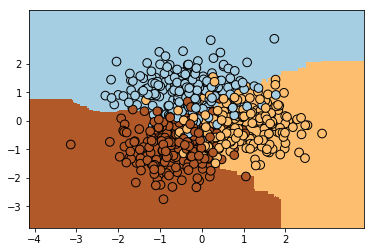

Clasificador validación


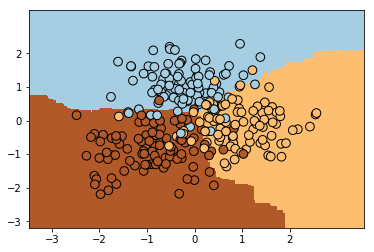


########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.91      0.81      0.85       208
    Clase 1       0.81      0.82      0.82       214
    Clase 2       0.80      0.88      0.83       208

avg / total       0.84      0.83      0.84       630

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.90      0.84      0.87        92
    Clase 1       0.85      0.81      0.83        86
    Clase 2       0.82      0.91      0.87        92

avg / total       0.86      0.86      0.86       270

########################################

numeros de arbol extremadamente aleatorio 100
Clasificador entrenamiento


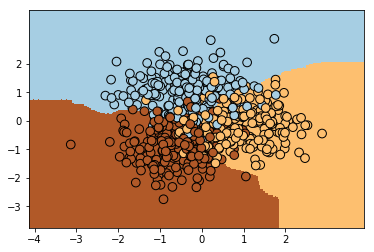

Clasificador validación


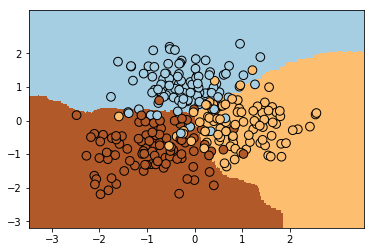


########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.90      0.82      0.86       208
    Clase 1       0.82      0.84      0.83       214
    Clase 2       0.82      0.88      0.85       208

avg / total       0.85      0.84      0.84       630

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.89      0.85      0.87        92
    Clase 1       0.85      0.83      0.84        86
    Clase 2       0.85      0.90      0.87        92

avg / total       0.86      0.86      0.86       270

########################################

numeros de arbol extremadamente aleatorio 150
Clasificador entrenamiento


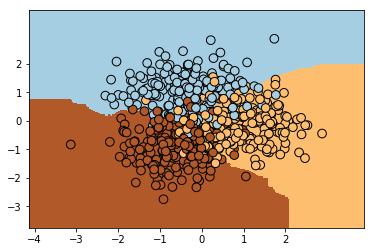

Clasificador validación


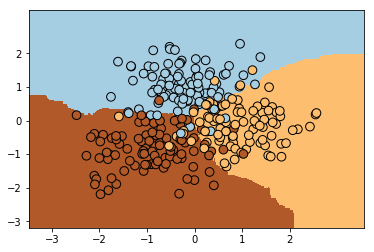


########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

    Clase 0       0.89      0.83      0.86       208
    Clase 1       0.82      0.84      0.83       214
    Clase 2       0.83      0.87      0.85       208

avg / total       0.85      0.84      0.84       630

########################################

########################################

 Desempeño del clasificador sobre el conjunto de validación

             precision    recall  f1-score   support

    Clase 0       0.90      0.86      0.88        92
    Clase 1       0.86      0.84      0.85        86
    Clase 2       0.86      0.91      0.88        92

avg / total       0.87      0.87      0.87       270

########################################



In [58]:
N_Arbol = 50

for i in range(1):
    for j in range(3):
        print('numeros de arbol aleatorio',N_Arbol)
        parametros = {'n_estimators':N_Arbol,'random_state':0,'max_depth':4}
        clasificador = RandomForestClassifier(**parametros)
        clasificador.fit(X_train_preproR, y_train)
        y_pred = clasificador.predict(X_test_preproR)
        print('Clasificador entrenamiento')
        visualizar_clasificador(clasificador, X_train_preproR, y_train)
        print('Clasificador validación')
        visualizar_clasificador(clasificador, X_test_preproR, y_test)
        N_Arbol = N_Arbol + 50
        nombres_clases = ['Clase 0', 'Clase 1','Clase 3'] #generamos una lista con los nombres de las clases
        print('\n'+"#"*40) 
        print('\n Desempeño del clasificador sobre el conjunto de entrenamiento\n')
        print(classification_report(y_train, clasificador.predict(X_train_preproR), target_names = nombres_clases))  #generamos e imprimimos el
        #reporte para el conjunto de entrenamiento
        print("#"*40 + "\n")
        
        print("#"*40) 
        print("\n Desempeño del clasificador sobre el conjunto de validación\n") 
        print(classification_report(y_test, y_pred, target_names = nombres_clases)) #generamos e imprimimos el resporte para el
        #conjunto de validación
        print("#"*40 + "\n")
        plt.show()
    
    N_Arbol = 50
    for h in range(3):
        print('numeros de arbol extremadamente aleatorio',N_Arbol)
        parametros = {'n_estimators':N_Arbol,'random_state':0,'max_depth':4}
        clasificador = ExtraTreesClassifier(**parametros)
        clasificador.fit(X_train_preproR, y_train)
        y_pred = clasificador.predict(X_test_preproR)
        print('Clasificador entrenamiento')
        visualizar_clasificador(clasificador, X_train_preproR, y_train)
        print('Clasificador validación')
        visualizar_clasificador(clasificador, X_test_preproR, y_test)
        N_Arbol = N_Arbol + 50
        nombres_clases = ['Clase 0', 'Clase 1','Clase 2'] #generamos una lista con los nombres de las clases
        print('\n'+"#"*40) 
        print('\n Desempeño del clasificador sobre el conjunto de entrenamiento\n')
        print(classification_report(y_train, clasificador.predict(X_train_preproR), target_names = nombres_clases))  #generamos e imprimimos el
        #reporte para el conjunto de entrenamiento
        print("#"*40 + "\n")
        print("#"*40) 
        print("\n Desempeño del clasificador sobre el conjunto de validación\n") 
        print(classification_report(y_test, y_pred, target_names = nombres_clases)) #generamos e imprimimos el resporte para el
        #conjunto de validación
        print("#"*40 + "\n")
        plt.show()
        
        
